In [5]:
import sys
sys.path.append("../..")

import time
import pprint
import numpy as np
from tqdm import tqdm
import multiprocessing
from sympy import Symbol
import matplotlib.pyplot as plt
from utils.plot_utils import set_fontsize
from optical_bloch.utils.general import flatten
from optical_bloch import Hamiltonian, Dissipator, BlochEquations

In [88]:
E0 = Symbol(u'E0', real = True)
E1 = Symbol(u'E1', real = True)
E2 = Symbol(u'E2', real = True)
Ee1 = Symbol(u'Ee1', real = True)
Ee2 = Symbol(u'Ee2', real = True)

ωl = Symbol(u'ωl', real = True)
Ωl = Symbol(u'Ωl', real = True)

δl = Symbol(u'δl', real = True)

Δ = Symbol('Δ', real = True)
Δe = Symbol('Δe', real = True)

In [89]:
ham = Hamiltonian(5)
ham.addEnergies([E0, E1, E2, Ee1, Ee2])
ham.addCoupling(2,3,Ωl, ωl)
ham.addCoupling(2,4,Ωl, ωl)
ham.eqnTransform()
ham.defineZero(Ee1)
ham.defineStateDetuning(2,3,δl)
ham.defineStateDetuning(2,4,δl)

In [134]:
Γ0 = Symbol(u'Γ0', real = True)
Γ1 = Symbol(u'Γ1', real = True)
Γ2 = Symbol(u'Γ2', real = True)
dis = Dissipator(ham.levels)
dis.addDecay(4,2,Γ2)
dis.addDecay(4,1,Γ1)
dis.addDecay(4,0,Γ0)
dis.addDecay(3,2,Γ2)
dis.addDecay(3,1,Γ1)
dis.addDecay(3,0,Γ0)

In [135]:
from sympy import nsimplify
ham.transformed = nsimplify(ham.transformed)

In [136]:
ham.transformed

Matrix([
[E0,  0,     0,     0,     0],
[ 0, E1,     0,     0,     0],
[ 0,  0,   -δl, -Ωl/2, -Ωl/2],
[ 0,  0, -Ωl/2,     0,     0],
[ 0,  0, -Ωl/2,     0,   Ee2]])

In [137]:
dis.dissipator

Matrix([
[               Γ0*(ρ₃₃(t) + ρ₄₄(t)),                                   0,                                   0,          -(Γ0 + Γ1 + Γ2)*ρ₀₃(t)/2, -(Γ0 + Γ1 + Γ2)*ρ₀₄(t)/2],
[                                  0,                Γ1*(ρ₃₃(t) + ρ₄₄(t)),                                   0,          -(Γ0 + Γ1 + Γ2)*ρ₁₃(t)/2, -(Γ0 + Γ1 + Γ2)*ρ₁₄(t)/2],
[                                  0,                                   0,                Γ2*(ρ₃₃(t) + ρ₄₄(t)),          -(Γ0 + Γ1 + Γ2)*ρ₂₃(t)/2, -(Γ0 + Γ1 + Γ2)*ρ₂₄(t)/2],
[-(Γ0 + Γ1 + Γ2)*conjugate(ρ₀₃(t))/2, -(Γ0 + Γ1 + Γ2)*conjugate(ρ₁₃(t))/2, -(Γ0 + Γ1 + Γ2)*conjugate(ρ₂₃(t))/2,            -(Γ0 + Γ1 + Γ2)*ρ₃₃(t),   -(Γ0 + Γ1 + Γ2)*ρ₃₄(t)],
[-(Γ0 + Γ1 + Γ2)*conjugate(ρ₀₄(t))/2, -(Γ0 + Γ1 + Γ2)*conjugate(ρ₁₄(t))/2, -(Γ0 + Γ1 + Γ2)*conjugate(ρ₂₄(t))/2, -(Γ0 + Γ1 + Γ2)*conjugate(ρ₃₄(t)),   -(Γ0 + Γ1 + Γ2)*ρ₄₄(t)]])

In [100]:
ham1 = Hamiltonian(4)
ham1.addEnergies([E0, E2, Ee1, Ee2])
ham1.addCoupling(1,2,Ωl, ωl)
ham1.addCoupling(1,3,Ωl, ωl)

ham1.eqnTransform()

ham1.defineStateDetuning(1,2,δl)
ham1.defineStateDetuning(1,3,δl)
ham1.defineZero(Ee1)

ham1.transformed = nsimplify(ham1.transformed)
ham1.transformed

Matrix([
[E0,     0,     0,     0],
[ 0,   -δl, -Ωl/2, -Ωl/2],
[ 0, -Ωl/2,     0,     0],
[ 0, -Ωl/2,     0,   Ee2]])

In [101]:
dis1 = Dissipator(ham1.levels)
dis1.addDecay(3,1,Γ)
dis1.addDecay(3,0,2*Γ)
dis1.addDecay(2,1,Γ)
dis1.addDecay(2,0,2*Γ)

dis1.dissipator

Matrix([
[   2*Γ*(ρ₂₂(t) + ρ₃₃(t)),                        0,          -3*Γ*ρ₀₂(t)/2, -3*Γ*ρ₀₃(t)/2],
[                       0,      Γ*(ρ₂₂(t) + ρ₃₃(t)),          -3*Γ*ρ₁₂(t)/2, -3*Γ*ρ₁₃(t)/2],
[-3*Γ*conjugate(ρ₀₂(t))/2, -3*Γ*conjugate(ρ₁₂(t))/2,            -3*Γ*ρ₂₂(t),   -3*Γ*ρ₂₃(t)],
[-3*Γ*conjugate(ρ₀₃(t))/2, -3*Γ*conjugate(ρ₁₃(t))/2, -3*Γ*conjugate(ρ₂₃(t)),   -3*Γ*ρ₃₃(t)]])

In [102]:
bloch = BlochEquations(ham.levels, dis.density_matrix, ham.transformed, dis.dissipator)
bloch1 = BlochEquations(ham1.levels, dis1.density_matrix, ham1.transformed, dis1.dissipator)

In [56]:
y0 = np.zeros([bloch.levels, bloch.levels], dtype = complex)
y0[2,2] = 1
y0 = y0.flatten()

In [103]:
y1 = np.zeros([bloch1.levels, bloch1.levels], dtype = complex)
y1[1,1] = 1
y1 = y1.flatten()

In [124]:
replacements = [(δl, 0),
                (Ωl, Γ),
                (E0, 20),
                (E1, 20.2),
                (Ee2, 0),
                (Γ, 1)]

In [125]:
%%time
sol = bloch.solveNumeric(replacements, [0,30], y0, method = 'BDF')

Wall time: 579 ms


In [126]:
%%time
sol1 = bloch1.solveNumeric(replacements, [0,30], y1, method = 'BDF')

Wall time: 344 ms


0.4998665657372085

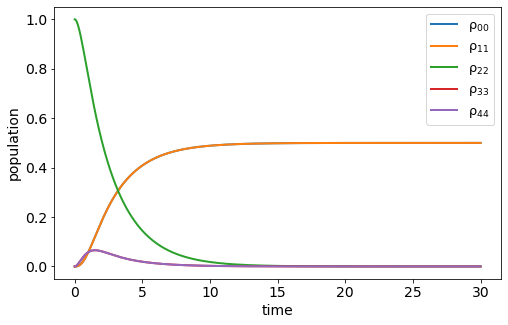

In [127]:
r = np.einsum("iij->ij", sol.y.reshape(ham.levels, ham.levels,sol.t.size)).real

fig, ax = plt.subplots(figsize = (8,5))
for idx in range(ham.levels):
    ax.plot(sol.t, r[idx], label = f'ρ$_{{{idx}{idx}}}$', lw = 2)

ax.legend(fontsize = 13)
ax.set_xlabel('time')
ax.set_ylabel('population')

set_fontsize(ax, 14)

np.trapz(np.sum(sol.y[[-2,-1]].real, axis = 0), sol.t)

0.4998665657372085

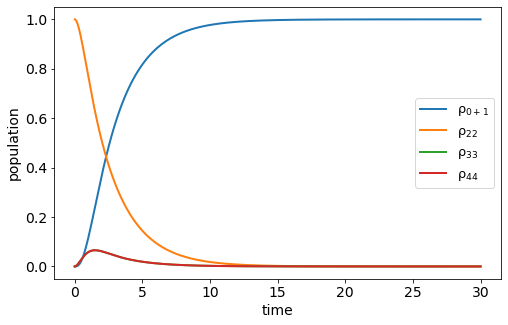

In [132]:
r = np.einsum("iij->ij", sol.y.reshape(ham.levels, ham.levels,sol.t.size)).real

fig, ax = plt.subplots(figsize = (8,5))
for idx in range(ham.levels):
    if idx == 0:
        ax.plot(sol.t, r[idx:idx+2].sum(axis = 0), label = f'ρ$_{{0+1}}$', lw = 2)
    elif idx not in [0,1]:
        ax.plot(sol.t, r[idx], label = f'ρ$_{{{idx}{idx}}}$', lw = 2)

ax.legend(fontsize = 13)
ax.set_xlabel('time')
ax.set_ylabel('population')

set_fontsize(ax, 14)

np.trapz(np.sum(sol.y[[-2,-1]].real, axis = 0), sol.t)

0.49985511346599265

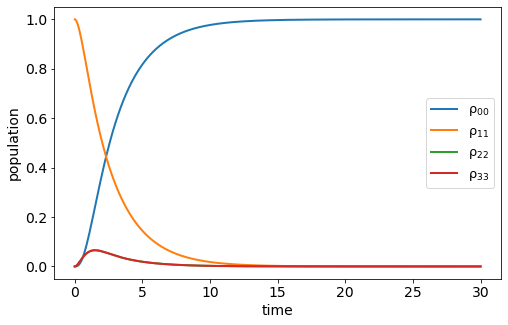

In [128]:
r = np.einsum("iij->ij", sol1.y.reshape(ham1.levels, ham1.levels,sol1.t.size)).real

fig, ax = plt.subplots(figsize = (8,5))
for idx in range(ham1.levels):
    ax.plot(sol1.t, r[idx], label = f'ρ$_{{{idx}{idx}}}$', lw = 2)

ax.legend(fontsize = 13)
ax.set_xlabel('time')
ax.set_ylabel('population')

set_fontsize(ax, 14)

np.trapz(np.sum(sol1.y[[-2,-1]].real, axis = 0), sol1.t)

In [122]:
bloch.solveSteadyStateSymbolic([(Ee2, 0), (E0, 20.2), (E1, 20.2)])

{ρ₀₀: 1.0 - ρ₁₁,
 ρ₄₄: 0.0,
 conjugate(ρ₃₄): 0.0,
 conjugate(ρ₁₄): 0.0,
 conjugate(ρ₀₄): 0.0,
 conjugate(ρ₂₄): 0.0,
 ρ₃₄: 0.0,
 conjugate(ρ₂₃): 0.0,
 conjugate(ρ₁₃): 0.0,
 conjugate(ρ₀₃): 0.0,
 ρ₂₄: 0.0,
 ρ₂₂: 0.0,
 ρ₂₃: 0.0,
 conjugate(ρ₁₂): 0.0,
 conjugate(ρ₀₂): 0.0,
 ρ₁₄: 0.0,
 ρ₁₃: 0.0,
 ρ₁₂: 0.0,
 ρ₀₄: 0.0,
 ρ₀₃: 0.0,
 ρ₀₂: 0.0,
 ρ₃₃: 0.0}

In [133]:
bloch1.solveSteadyStateSymbolic([(Ee2, 0), (E0, 20.2), (E1, 20.2)])

{ρ₀₀: 1.00000000000000,
 ρ₃₃: 0.0,
 conjugate(ρ₂₃): 0.0,
 conjugate(ρ₀₃): 0.0,
 conjugate(ρ₁₃): 0.0,
 ρ₂₃: 0.0,
 conjugate(ρ₁₂): 0.0,
 conjugate(ρ₀₂): 0.0,
 ρ₁₃: 0.0,
 ρ₁₁: 0.0,
 ρ₁₂: 0.0,
 conjugate(ρ₀₁): 0.0,
 ρ₀₃: 0.0,
 ρ₀₂: 0.0,
 ρ₀₁: 0.0,
 ρ₂₂: 0.0}